In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("desmatamento_prodes.csv")

In [ ]:
#renomeando coluna
df = df.rename(columns={'referencia': 'ano'})
df.head()

,ano,acre,amazonas,amapa,maranhao,mato_grosso,para,rondonia,roraima,tocantins,area_total_desmatamento
0,1988,620,1510,60,2450,5140,6990,2340,290,1650,21050
1,1989,540,1180,130,1420,5960,5750,1430,630,730,17770
2,1990,550,520,250,1100,4020,4890,1670,150,580,13730
3,1991,380,980,410,670,2840,3780,1110,420,440,11030
4,1992,400,799,36,1135,4674,3787,2265,281,409,13786


In [ ]:
#acessando informações 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   ano                      35 non-null     int64
 1   acre                     35 non-null     int64
 2   amazonas                 35 non-null     int64
 3   amapa                    35 non-null     int64
 4   maranhao                 35 non-null     int64
 5   mato_grosso              35 non-null     int64
 6   para                     35 non-null     int64
 7   rondonia                 35 non-null     int64
 8   roraima                  35 non-null     int64
 9   tocantins                35 non-null     int64
 10  area_total_desmatamento  35 non-null     int64
dtypes: int64(11)
memory usage: 3.1 KB


In [ ]:
#verificando presença de valores nulos
df.isna().sum()

ano                        0
acre                       0
amazonas                   0
amapa                      0
maranhao                   0
mato_grosso                0
para                       0
rondonia                   0
roraima                    0
tocantins                  0
area_total_desmatamento    0
dtype: int64

In [ ]:
#excluindo dados duplicados
df = df.drop_duplicates()

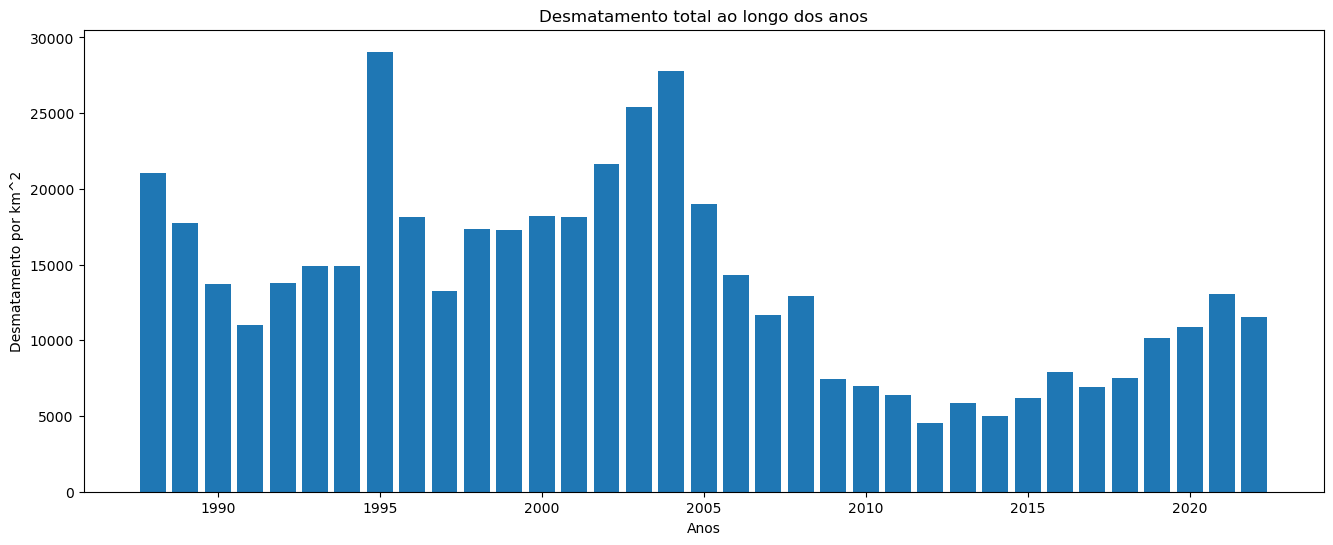

In [9]:
#Como o desmatamento total variou ao longo dos anos no Brasil?
plt.figure(figsize=(16,6))
plt.bar(df['ano'], df['area_total_desmatamento'])
plt.title('Desmatamento total ao longo dos anos')
plt.xlabel('Anos')
plt.ylabel('Desmatamento por km^2')
plt.show()

In [10]:
#Qual foi o estado com o maior desmatamento em cada ano?
df_estados = df.drop(columns='area_total_desmatamento')
df_estados_ano = df_estados.set_index('ano').idxmax(axis=1).reset_index()
df_estados_ano.columns = ['ano', 'estado_maior_desmatamento']
df_estados_ano


,ano,estado_maior_desmatamento
0,1988,para
1,1989,mato_grosso
2,1990,para
3,1991,para
4,1992,mato_grosso
5,1993,mato_grosso
6,1994,mato_grosso
7,1995,mato_grosso
8,1996,mato_grosso
9,1997,mato_grosso


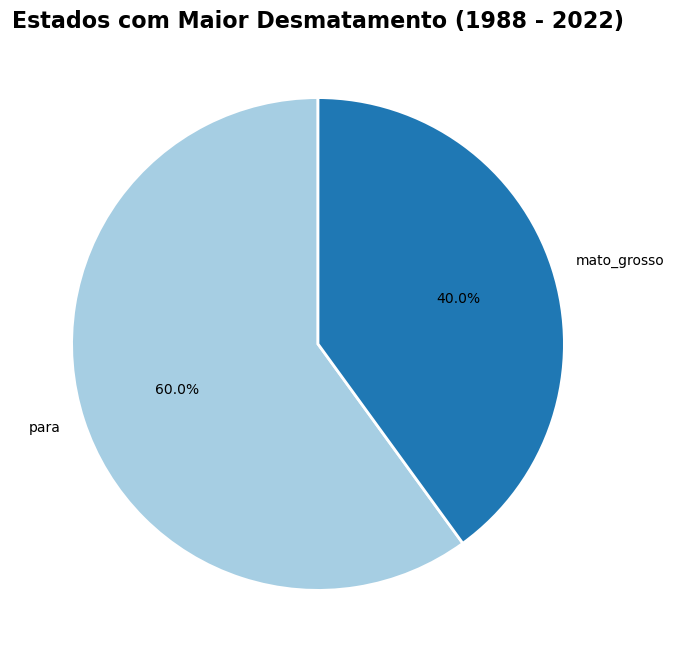

In [30]:
estados_maior = df_estados_ano['estado_maior_desmatamento'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    estados_maior, 
    labels=estados_maior.index,
    autopct='%1.1f%%',           
    startangle=90,               
    colors=plt.cm.Paired.colors, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 2}  
)

plt.title('Estados com Maior Desmatamento (1988 - 2022)', fontsize=16, fontweight='bold')
plt.show()

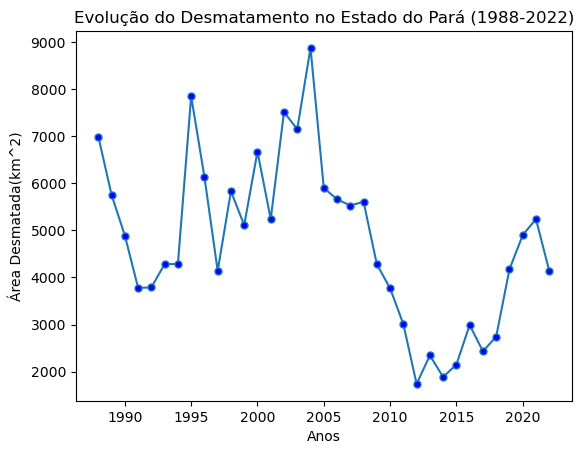

In [20]:
#Como o desmatamento total no estado do Pará e do Amazonas evoluiu ao longo dos anos?
plt.plot(df['ano'],df['para'], marker='o', markersize=5, markerfacecolor='blue')
plt.xlabel('Anos')
plt.ylabel('Área Desmatada(km^2)')
plt.title('Evolução do Desmatamento no Estado do Pará (1988-2022)')
plt.show()


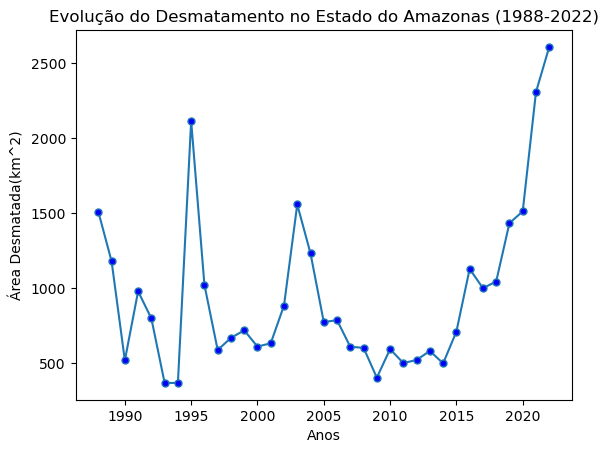

In [13]:
plt.plot(df['ano'],df['amazonas'], marker='o', markersize=5, markerfacecolor='blue')
plt.xlabel('Anos')
plt.ylabel('Área Desmatada(km^2)')
plt.title('Evolução do Desmatamento no Estado do Amazonas (1988-2022)')
plt.show()

In [14]:
#Qual foi a média de desmatamento por estado?
df_media_estados = df[['acre','amazonas','amapa','maranhao','mato_grosso','para','rondonia','roraima','tocantins']].mean().reset_index()
df_media_estados.columns = ['estado', 'media']
df_media_estados

,estado,media
0,acre,500.428571
1,amazonas,954.200000
2,amapa,47.485714
3,maranhao,753.857143
4,mato_grosso,4344.485714
5,para,4764.371429
6,rondonia,1889.571429
7,roraima,261.400000
8,tocantins,251.142857


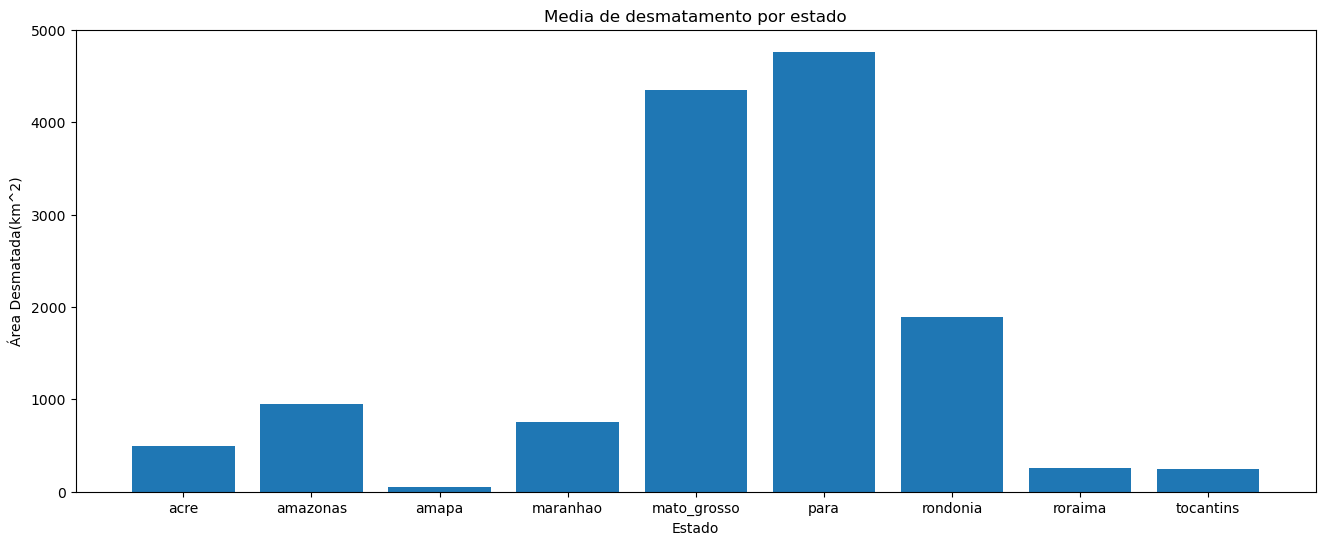

In [15]:
plt.figure(figsize=(16,6))
plt.bar(df_media_estados['estado'],df_media_estados['media'])
plt.title('Media de desmatamento por estado')
plt.xlabel('Estado')
plt.ylabel('Área Desmatada(km^2)')
plt.xticks(rotation= 0)
plt.show()


In [16]:
#Qual é o total de área desmatada no Brasil ao longo de todo o período disponível (1988-2022)?

total_area = df['area_total_desmatamento'].sum()
print('Total de área desmatada da floresta amazônica no Brasil ao longo dos anos(1988 - 2022) é de', total_area,'km^2')

Total de área desmatada da floresta amazônica no Brasil ao longo dos anos(1988 - 2022) é de 481843 km^2
